Langmuir Isotherm
----

Reproduce the Langmuir isotherm directly from numerical results from MECSim using a mechanism that mimics adsorption by using a pre-existing surface confined species rather than the assumption of free and taken sites on the electrode. In practice these are the same thing, which is why MECSim reproduces the isotherm without in-built assumptions.

The Langmuir isotherm gives the surface converage of substrate A as:
$$
\theta_A = \frac{K_{eq}^A A}{1 + K_{eq}^A A}
$$
where $A$ is the concentration of solution species A (mol/cm$^3$) and $K_{eq}^A = k_f/k_b$ for the reaction
$$
A + B^* = A^*
$$
where $^*$ denotes a surface confined species, $A^*$ is the substrate version of $A$ in solution, and $B^*$ can be thought of as a pre-existing surface species (as MECSim does) or as an empty site (as Langmuir assumed).

In [1]:
# import required python packages
%matplotlib inline
import numpy as np
from matplotlib  import cm
import matplotlib.pyplot as plt
from latexify import *

In [2]:
# results from single parameter sweep over concentration of A
f = open('results_VaryA.txt', 'r')
x = []
y = []
xplotmax = 0.0
yplotmax = 0.0
for line in f:
    columns = line.split()
    x.append(float(columns[0]))
    y.append(float(columns[1]))
    xplotmax = max(xplotmax,x[-1])
    yplotmax = max(yplotmax,y[-1])

In [3]:
# calculate the theoretical curve by Langmuir isotherm
Keq = 1.0
f = np.asarray(x)
for i in range(len(x)):
    f[i] = Keq * x[i] / (1.0 + Keq * x[i])

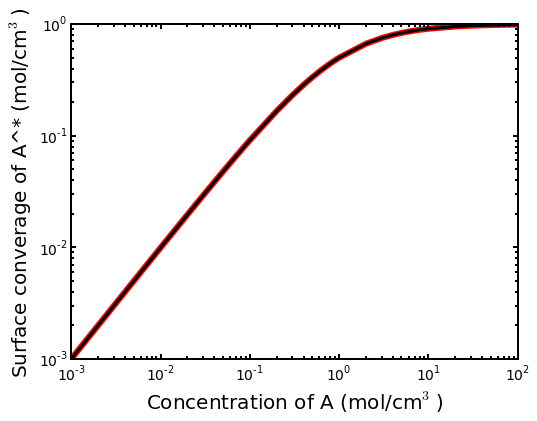

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.plot(x, f, 'r', linewidth=6)
plt.plot(x, y, 'k', linewidth=3)
plt.xlim(0.0010, 100.0)
plt.ylim(0.0010, 1.0)
plt.xlabel('Concentration of A (mol/cm$^3$)', fontsize=20)
plt.ylabel('Surface converage of A^* (mol/cm$^3$)', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('Langmuir.png')
plt.savefig('Langmuir.ps')
plt.savefig('Langmuir.pdf')